Years Experience vs Salary

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the dataset
data = pd.read_csv('/content/Salary.csv')

# Display first few rows
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


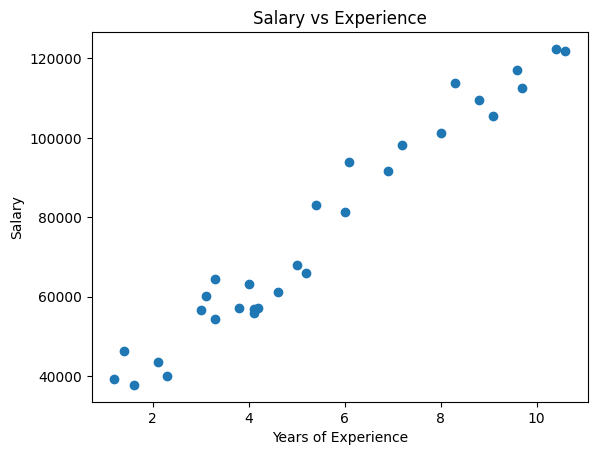

In [4]:
# Plot data to see the relationship
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [5]:
# Step 4: Split data
X = data[['YearsExperience']]
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Predict on test data
y_pred = model.predict(X_test)


In [8]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 49830096.855908394
R2 Score: 0.9024461774180497


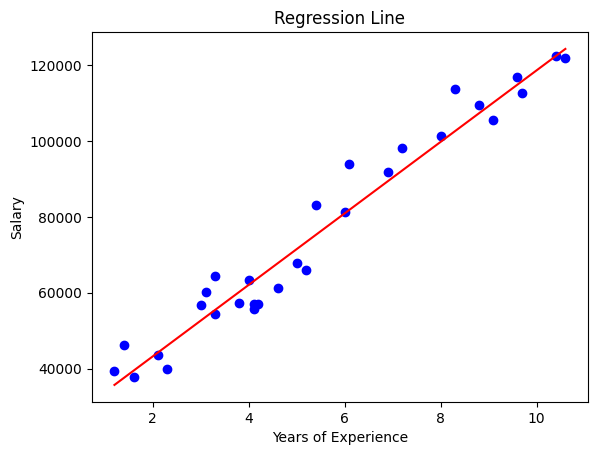

In [9]:
# Plot the regression line
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regression Line')
plt.show()

Mean Squared Error with Polynomial Regression: 46560480.974083684
R2 Score with Polynomial Regression: 0.9088471990449791


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


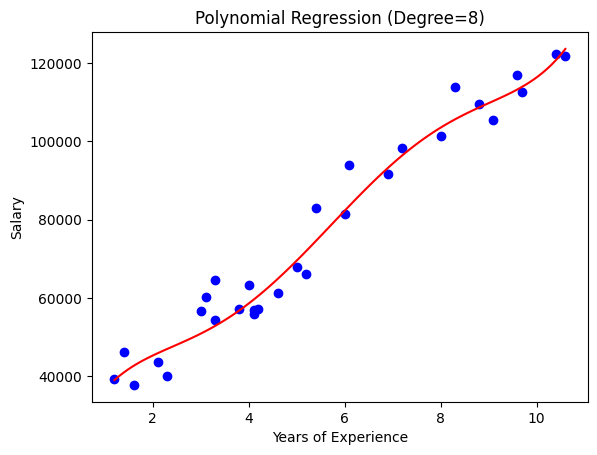

In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Step 5: Apply Polynomial Features
# Degree = 2 means we will create x and x^2
poly = PolynomialFeatures(degree=5)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 6: Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 7: Predict
y_pred = model.predict(X_test_poly)

# Step 8: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error with Polynomial Regression: {mse}")
print(f"R2 Score with Polynomial Regression: {r2}")

# Step 9: Plot
# For plotting, we need to predict over all X (not just X_test)
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.scatter(X, y, color='blue')
plt.plot(X_range, y_range_pred, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression (Degree=8)')
plt.show()

Hours vs Score

 Mean Squared Error: 27.207113443052698
 R2 Score: 0.9586020173396832


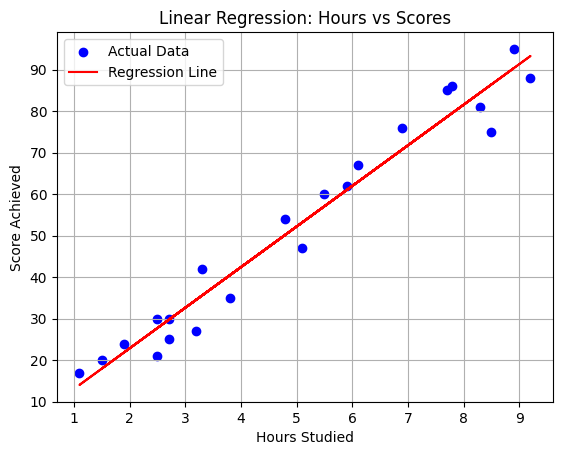

In [13]:
#  Load and clean dataset
nou = pd.read_csv('/content/student_scores.csv')
nou = nou.dropna()  # Remove nulls if any

#  Prepare input and target
X = nou[['Hours']]  # Independent variable
y = nou[['Scores']]  # Dependent variable

# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

#  Make predictions
y_pred = model.predict(X)

#  Evaluate model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f" Mean Squared Error: {mse}")
print(f" R2 Score: {r2}")

#  Visualize
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Score Achieved')
plt.title('Linear Regression: Hours vs Scores')
plt.legend()
plt.grid(True)
plt.show()

 Mean Squared Error (Polynomial Regression): 20.54799389313212
 R2 Score (Polynomial Regression): 0.9687344452518762


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


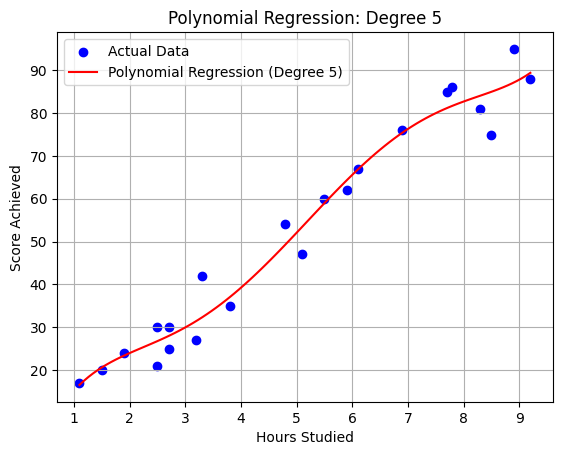

In [14]:
# Load and clean dataset
nou = pd.read_csv('/content/student_scores.csv')
nou = nou.dropna()

#  Prepare input and target
X = nou[['Hours']]
y = nou[['Scores']]

#  Apply Polynomial Features
degree = 5  # you can change degree easily
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

#  Build and train Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y)

#  Make predictions
y_pred = model.predict(X_poly)

#  Evaluate model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f" Mean Squared Error (Polynomial Regression): {mse}")
print(f" R2 Score (Polynomial Regression): {r2}")

#  Visualize
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_range, y_range_pred, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('Hours Studied')
plt.ylabel('Score Achieved')
plt.title(f'Polynomial Regression: Degree {degree}')
plt.legend()
plt.grid(True)
plt.show()
